## Dataset

###### La part d'entrega està al final del notebook per tal d'aprofitar tot el material i la càrrega del dataset

Per aquesta entrega utilitzarem una base de dades de imatges: Fashion-MNIST. És similar a la base de dades de MNIST, un dataset clàssic en la visió per computador. Són imatges de 28x28 pixels i en escala de grisos. L'original disposa de 60.000 imatges d'entrenament i 10.000 de test. Està anotat en 10 categories diferents:


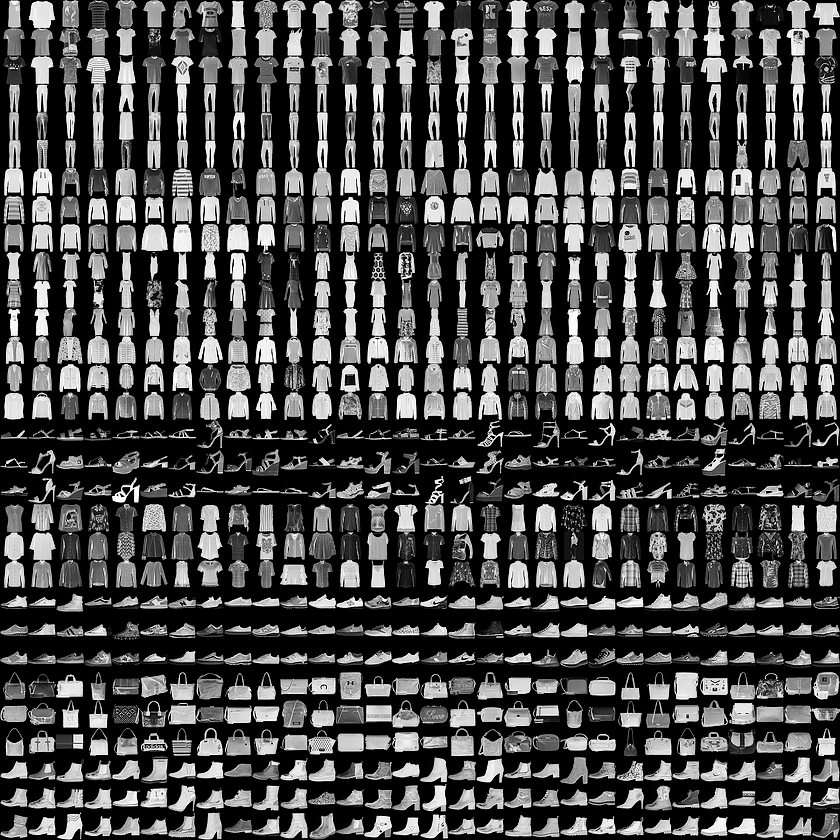

|Id|Nom|
|:-:|:--|
|0|T-shirt/top 
|1|Trouser |
|2|Pullover| 
|3|Dress|
|4|Coat|
|5|Sandal|
|6|Shirt|
|7|Sneaker|
|8|Bag |
|9|Ankle boot|


Podeu trobar el csv original a: https://www.kaggle.com/zalando-research/fashionmnist.

Els hem simplificat i dividit en altres csv més petits. Tenim els originals, i llavors un subsampling (100 vegades més petit). Dels petits, a més, també tenim el cas binari.

| nom | set | # exemples | # categories |
|:--|:-:|:-:|:-:|
|fashion-mnist_train_small_binary.csv   |train|     600 |  2 |
|fashion-mnist_test_small_binary.csv    |test |     100 |  2 |
|fashion-mnist_train_small.csv          |train|     600 | 10 |
|fashion-mnist_test_small.csv           |test |     100 | 10 |
|fashion-mnist_train.csv                |train|  60.000 | 10 |
|fashion-mnist_test.csv                 |test |  10.000 | 10 |

Les dues originals, les podeu *descarregar* del link de [Kaggle](https://www.kaggle.com/zalando-research/fashionmnist?select=fashion-mnist_train.csv). Son uns 150MB una vegada descomprimits.

Inicialment carregarem les funcions i paquets que usarem durant aquest codi

In [1]:
import numpy as np

# funcions i paquets per a visualitzacio
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# paquet per a manipulacio de dades
import pandas as pd

# funcions i paquets per a carregar datasets especifics (exemples simples)
from sklearn import datasets

# funcions per a processat de dades
from sklearn.preprocessing import StandardScaler
# funcions per a partició de dades
from sklearn.model_selection import train_test_split
# funcions per a classificacio kNN
from sklearn.neighbors import KNeighborsClassifier
# funcions per a metriques de rendiment
from sklearn.metrics import accuracy_score,  precision_score, recall_score, roc_curve,roc_auc_score, auc
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, precision_recall_curve
from sklearn import preprocessing

#funcions per a la validació creuada
from sklearn.model_selection import cross_val_score

Carreguem la base de dades

In [3]:
# Visualitzarem només 3 decimals per mostra, i definim el num de files i columnes a mostrar
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 50)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('fashion-mnist_train_small_binary.csv')
y = dataset["label"].to_numpy()
X = dataset.drop("label", axis="columns").to_numpy()


print(f'tamany de les dades: {X.shape}')
print(f'Caracteristiques: \n {y}')
print("Dimensionalitat de la BBDD:", dataset.shape)


tamany de les dades: (600, 784)
Caracteristiques: 
 [1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1
 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1

En una primera visualització mostrem la distribució de les dues primeres variables.

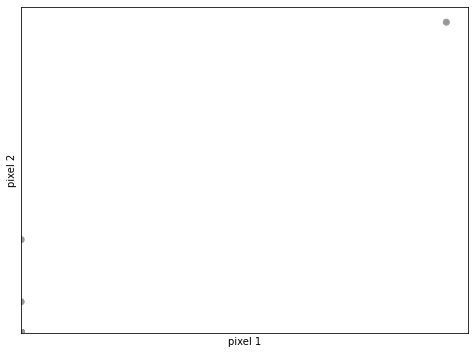

In [3]:
x_min, x_max = X[:, 0].min()*.95, X[:, 0].max() *1.05
y_min, y_max = X[:, 1].min()*0.95, X[:, 1].max() *1.05


plt.ion()
plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='face')
plt.xlabel("pixel 1")
plt.ylabel("pixel 2")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

Abans de fer qualsevol entrenament cal dividir, com a mínim, el conjunt de dades en dos parts, **entrenament** i **test**. La llibreria sklearn ens proporciona eines per fer-ho més fàcil i ens dona les dades ja barrejades i estratificades (si volem).  
Consulteu [`split_train_test`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [4]:
#trenquem el conjunt en 55% training i 45% test
x_train,x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Ara ja podem entrenar un classificador, en el nostre cas el kNN. Aquest entrenament el fem amb les dades seleccionades per a training.

In [5]:
#apliquem knn
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)

KNeighborsClassifier()

El següent pas és aplicar el classificador sobre dades no vistes en l'entrenament. Podeu provar de canviar el parametre K (n_neighbors) i veure si canvia res en els propers passos.

In [6]:
predictions = model.predict(x_test)
predictions

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1], dtype=int64)

Ens retorna 0 i 1 indicant quina classe li assigna a cada un dels casos de la matriu x_test (cada fila correspon a un cas). Però no sabem com de bo és el nostre model. Cal aplicar les *mètriques de rendiment*.

Accuracy:0.95
Precision:0.9874213836477987
Recall:0.9573170731707317


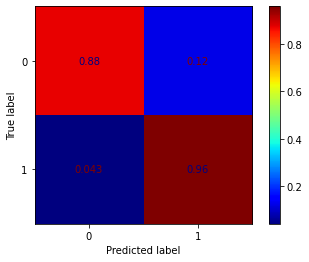

In [7]:
#metrics
acc = accuracy_score(y_test, predictions)
prec = precision_score(y_test, predictions)
rec = recall_score(y_test, predictions)
conf_mat = confusion_matrix(y_test, predictions).T

print(f'Accuracy:{acc}')
print(f'Precision:{prec}')
print(f'Recall:{rec}')
plot_confusion_matrix(model, x_test, y_test, normalize='true', cmap='jet')


## Rang de les dades
És fonamental tenir present que les dades poden representar coses molt diferents. En el nostre exemple el rang és 'similar' per a totes les característiques però no sol ser el cas.

Si forcem la segona característica a tenir un rang 1000 vegades superior al de les altres ....

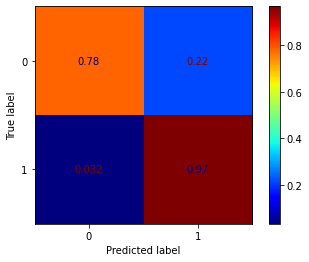

In [8]:
#X = cancer.data
X[:,1] = X[:,1]*1000
x_train,x_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=42)

model.fit(x_train,y_train)
predictions = model.predict(x_test)
plot_confusion_matrix(model, x_test, y_test, normalize='true', cmap='jet')

El rendiment ha baixat significativament degut a que hem posat el major pes en una sola variable. Si observem com interactuen les diferents variables entre elles no veurem res estrany si no parem atenció (en aquest exemple només es mostren les primeres 4 variables)

In [9]:
df = pd.DataFrame(X[:,:4], columns=cancer.feature_names[:4])
g = sns.pairplot(df, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")

NameError: name 'cancer' is not defined

La 'trampa' està en com visualitzem les dades. Mirant només la interacció entre la 1a i la 2a  ...

NameError: name 'cancer' is not defined

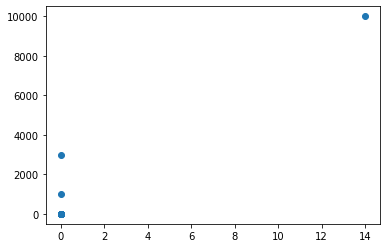

In [10]:
plt.figure()
plt.scatter(X[:,0], X[:,1])
plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[1])

Veiem que les dades estan prou ben distribuïdes, però els eixos tenen significats diferents. 1cm en l'eix horizontal són 1000 unitats de diferència mentre que en el vertical en són 0.5 unitats. Per arreglar-ho, forcem al sistema que ho representi de la mateixa manera ...

NameError: name 'cancer' is not defined

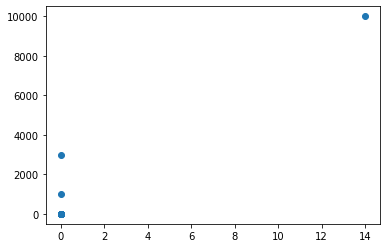

In [11]:
plt.figure()
plt.scatter(X[:,0], X[:,1])
plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[1])
plt.axis('equal')

Veiem que les variacions en la segona característica ja no tenen cap significat. Per arreglar-ho cal aplicar la normalització de les dades. És a dir, substreure la mitjana i dividir per la desviació estandard. Per sort, sklearn ens proporciona les eines. 

Consulteu [Standard Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

NameError: name 'cancer' is not defined

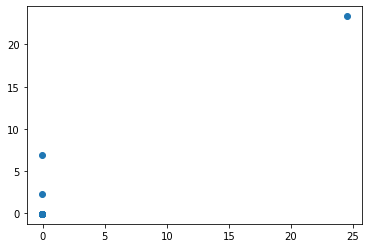

In [12]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
plt.scatter(X[:,0], X[:,1])
plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[1])
plt.axis('equal')

Hem perdut els rangs originals, però ara les dues característiques tenen la mateixa importància.

In [13]:
df = pd.DataFrame(X[:,:4], columns=cancer.feature_names[:4])
g = sns.pairplot(df, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")


NameError: name 'cancer' is not defined

La visualització que hem fet de les dades fa la normalització a efectes visuals però no l'aplica a les dades. Cal anar amb compte.

Si ara apliquem el classificador tornarem a tenir els rendiments i aquest cop no dependran del rang de les dades.

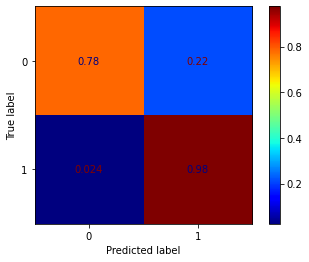

In [4]:
x_train,x_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=42)
model = KNeighborsClassifier(n_neighbors=10)
model.fit(x_train,y_train)
predictions = model.predict(x_test)
plot_confusion_matrix(model, x_test, y_test, normalize='true', cmap='jet')

## Corbes ROC i PR

A partir de la matriu de confusió podem calcular les mètriques de rendiment que hem vist més amunt (Acc, Prec, Rec), que calculen com de bé o malament ho fa un classificador tenint en compte la classe per la que "ha apostat" amb un llindar específic (i.e. 0.5).

Ara volem visualitzar com es comporta aquest classificador si anem canviant el llindar (amb el que obtindríem una matriu de confusió diferent per cada llindar). Podem utilitzar les corbes ROC i Precision-Recall. 

Obtenim les probabilitats de classificació per a cada una de les categories (abans d'aplicar el llindar) i ens quedem amb les probabilitats només per a la classe 1. 


In [15]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

Recordem com es calcula la corba ROC i la Precision-Recall. Per cada valor del llindar, tindrem una matriu de confusió diferent. La ROC mostra la relació FPR (1-Specificity) vs TPR (Recall) i la PR mostra la relació Precision vs Recall.

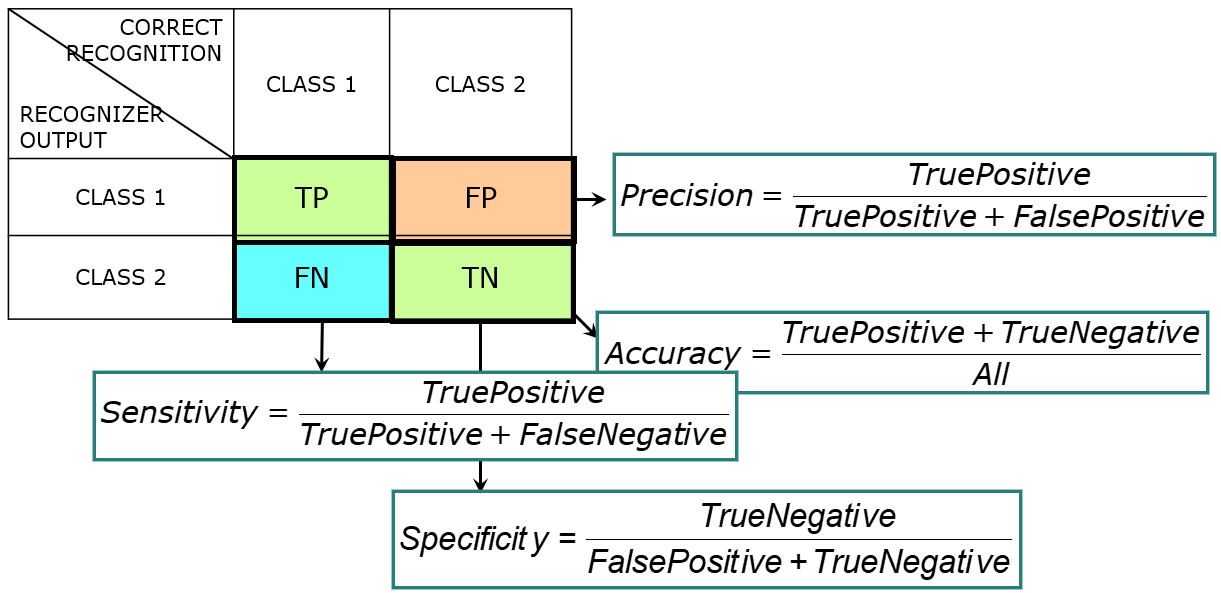

Classificador sense capacitat predictiva: ROC AUC=0.500
El nostre model: ROC AUC=0.984


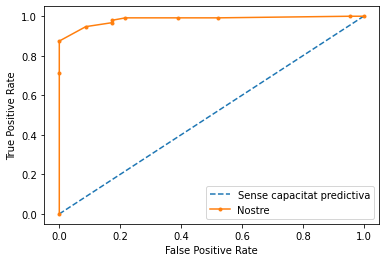

In [16]:
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Classificador sense capacitat predictiva: ROC AUC=%.3f' % (ns_auc))
print('El nostre model: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Sense capacitat predictiva')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Nostre')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Les corbes PR ens serveixen quan tenim un conjunt desbalancejat, sobretot quan tenim moltes mostres de la classe "no passa res"

El nostre model té una auc=0.998


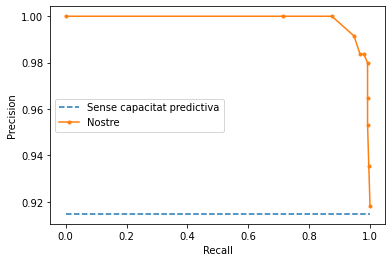

In [17]:
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_auc = auc(lr_recall, lr_precision)
# summarize score
print('El nostre model té una auc=%.3f' % (lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Sense capacitat predictiva')
plt.plot(lr_recall, lr_precision, marker='.', label='Nostre')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

## k-fold Cross-validation

Fins ara hem partit el nostre conjunt de dades en un 55\% de train i un 45\% de test, però només l'hem trencat una sola vegada. La primera pregunta seria: hem estat de sort quan hem trencat el nostre conjunt? Com assegurem que la partició no és casualment l'òptima per al nostre paràmetre? O potser el paràmetre triat no és el millor? Com ho podem valorar?

Ens basarem en les tècniques de validació creuada que:

1. Separen les dades en k subconjunts d'igual (o similar) mida
2. Tria un subconjunt i entrena el model amb els altres k-1 subconjunts
3. Repeteix el procés k vegades fins que tots els subconjunts s'han utilitzat per testejar

Podem utilitzar la funció cross_validate.

In [18]:
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(scores)
scores.mean()

[0.95       0.95833333 0.975      0.93333333 0.975     ]


0.9583333333333333

 Quin és el paràmetre del knn que farà que el nostre model sigui òptim?

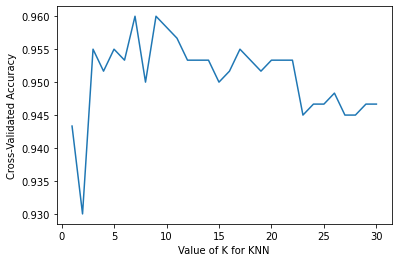

In [30]:
# choose k between 1 to 31
k_range = range(1, 31)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# Entrega Problemes
#### Reutilitzant material i càrrega del dataset de la part d'exemple

### a. Quin perfil tenen les corbes ROC i PR per diferents paràmetres del knn? Pots dibuixar tots les corbes ROC en una mateixa gràfica i les PR en una altra gràfica

(270, 2)
El nostre model knn.5: ROC AUC=0.956
(270, 2)
El nostre model knn.10: ROC AUC=0.956
(270, 2)
El nostre model knn.15: ROC AUC=0.974
(270, 2)
El nostre model knn.20: ROC AUC=0.977
(270, 2)
El nostre model knn.25: ROC AUC=0.970
(270, 2)
El nostre model knn.30: ROC AUC=0.968


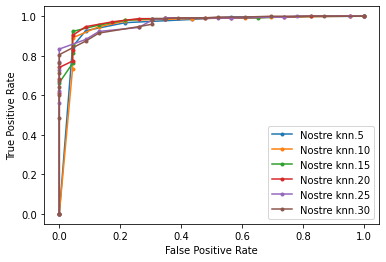

In [5]:
k_range = range(1, 7)
for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k*5)
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)

    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(y_test))]
    # predict probabilities
    lr_probs = model.predict_proba(x_test)
    # keep probabilities for the positive outcome only
    #print(lr_probs.shape)
    lr_probs = lr_probs[:, 1]
    lr_auc = roc_auc_score(y_test, lr_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
    plt.plot(lr_fpr, lr_tpr, marker='.', label=f'Nostre knn.{k*5}')
    print(f'El nostre model knn.{k*5}: ROC AUC=%.3f' % (lr_auc))

plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

El nostre model knn= 5 té una auc=0.996
El nostre model knn= 10 té una auc=0.995
El nostre model knn= 15 té una auc=0.997
El nostre model knn= 20 té una auc=0.998
El nostre model knn= 25 té una auc=0.997
El nostre model knn= 30 té una auc=0.997


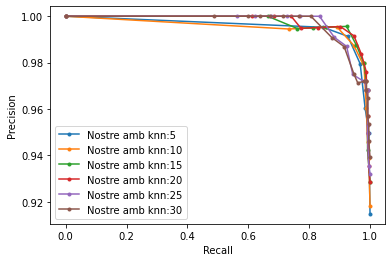

In [6]:
k_range = range(1, 7)
for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k*5)
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(y_test))]
    # predict probabilities
    lr_probs = model.predict_proba(x_test)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    
    lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
    lr_auc = auc(lr_recall, lr_precision)
    # summarize score
    print(f'El nostre model knn= {k*5} té una auc=%.3f' % (lr_auc))
    # plot the precision-recall curves
    plt.plot(lr_recall, lr_precision, marker='.', label=f'Nostre amb knn:{k*5}')


# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

### b. Quin paràmetre per al knn consideres òptim ?

Amb els resultats obtinguts veiem com tant per corves ROC com per les PR el valor KNN que ens retorna millor resultat és el knn=20

### c. Quina k has decidit utilitzar en el k-fold? 

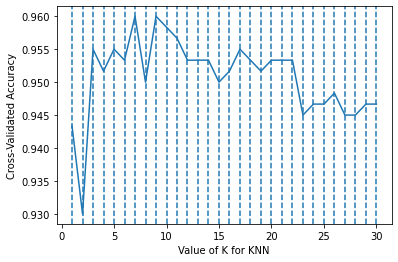

In [7]:
# choose k between 1 to 31
k_range = range(1, 31)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
    plt.axvline(k, ls="--")
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

Segons els valors que ens ha donat el k-fold validation, la nostra k que ens podria funcionar bé seria la k=7 o k=9

## KNN Multicategoria

### a. Compara les corbes ROC del knn multicategoria en una mateixa gràfica.

In [7]:
dataset = load_dataset('fashion-mnist_train_small.csv')
y = dataset[["label"]]
X = dataset.drop("label", axis="columns")


print(f'tamany de les dades: {X.shape}')
print(f'Caracteristiques: \n {y}')
print("Dimensionalitat de la BBDD:", dataset.shape)

stdScaler = StandardScaler()


tamany de les dades: (600, 784)
Caracteristiques: 
      label
0        2
1        9
2        6
3        0
4        3
..     ...
595      3
596      6
597      9
598      3
599      4

[600 rows x 1 columns]
Dimensionalitat de la BBDD: (600, 785)


In [8]:
#trenquem el conjunt en 55% training i 45% test
x_train,x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

El nostre model knn= 1 té una auc=0.600
El nostre model knn= 4 té una auc=0.665
El nostre model knn= 7 té una auc=0.646
El nostre model knn= 10 té una auc=0.635
El nostre model knn= 13 té una auc=0.651
El nostre model knn= 16 té una auc=0.611


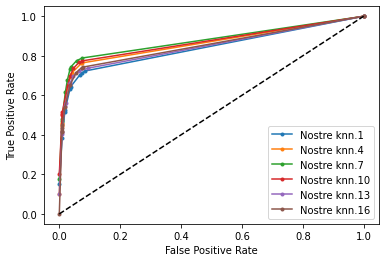

In [23]:
k_range = range(1,17,3)

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train.values.ravel())
    predictions = model.predict(x_test)
    
    falsePositive = []
    truePositive = []
    for index in range(0,10):
        class_predictions = np.array(list(map(lambda x:1 if x==index else 0, predictions)))
        class_y_test = y_test.applymap(lambda x: 1 if x==index else 0)
        
        falsePositiveRate, truePositiveRate, _ = roc_curve(class_predictions, class_y_test)
        falsePositive.append(falsePositiveRate)
        truePositive.append(truePositiveRate)
    
    all_falsePositive = np.unique(np.concatenate([falsePositive[i] for i in range(0,10)]))
    mean_truePositive = np.zeros_like(all_falsePositive)
    for i in range(0,10):
        mean_truePositive += np.interp(all_falsePositive, falsePositive[i], truePositive[i])
    mean_truePositive /= 10
    
    plt.plot(all_falsePositive, mean_truePositive, marker='.', label=f'Nostre knn.{k}')
    print(f'El nostre model knn= {k} té una auc=%.3f' % (sum(mean_truePositive) / 10))
    
plt.plot([0,1], [0,1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.show()
    

## c. Quina k has decidit utilitzar en el k-fold?

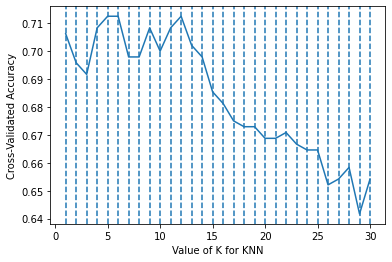

In [18]:
x_train,x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


# choose k between 1 to 31
k_range = range(1, 31)
k_scores = []
# use iteration to calculator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train.values.ravel(), cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
    plt.axvline(k, ls="--")
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show();

Veiem com el valor òptim de K pot ser k=5, k=6 o k=12